### Brief explanation about my tutorial:
We train a GAN on a subset of the CIFAR- 10 dataset.
During the training of the GAN, the script will periodically update the weights of the generator and discriminator models based on the loss functions defined.
The function generate_and_save_images is designed to generate and save images at the end of each epoch. 

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import torchvision.utils as vutils
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

In [2]:

# ✅ Force CPU mode
device = torch.device("cpu")

In [3]:
# ✅ Load CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
])


In [4]:
dataset = datasets.CIFAR10(root="./data", train=True, download=True, transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)


Files already downloaded and verified


In [5]:
# ✅ Define the Generator
class Generator(nn.Module):
    def __init__(self, latent_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 3 * 32 * 32),  # CIFAR-10 images are 3x32x32
            nn.Tanh()
        )

    def forward(self, z):
        img = self.model(z)
        img = img.view(-1, 3, 32, 32)  # Reshape to CIFAR-10 format
        return img

In [6]:
# ✅ Define the Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(3 * 32 * 32, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, img):
        img_flat = img.view(img.size(0), -1)  # Flatten image
        validity = self.model(img_flat)
        return validity


In [7]:
# ✅ Initialize models
latent_dim = 100  # Size of noise vector
generator = Generator(latent_dim).to(device)
discriminator = Discriminator().to(device)

In [8]:
# ✅ Loss and Optimizers
criterion = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))


Epoch [0/10] Batch 0/1563: D_loss=0.6966, G_loss=0.6689
Epoch [0/10] Batch 100/1563: D_loss=0.1668, G_loss=2.2595
Epoch [0/10] Batch 200/1563: D_loss=0.1120, G_loss=6.6486
Epoch [0/10] Batch 300/1563: D_loss=0.1810, G_loss=2.9501
Epoch [0/10] Batch 400/1563: D_loss=0.1164, G_loss=5.4037
Epoch [0/10] Batch 500/1563: D_loss=0.3255, G_loss=2.4885
Epoch [0/10] Batch 600/1563: D_loss=0.0424, G_loss=3.6427
Epoch [0/10] Batch 700/1563: D_loss=0.1526, G_loss=3.1606
Epoch [0/10] Batch 800/1563: D_loss=0.1682, G_loss=3.4834
Epoch [0/10] Batch 900/1563: D_loss=0.2348, G_loss=5.4395
Epoch [0/10] Batch 1000/1563: D_loss=0.3760, G_loss=7.3369
Epoch [0/10] Batch 1100/1563: D_loss=0.3041, G_loss=3.5773
Epoch [0/10] Batch 1200/1563: D_loss=0.1549, G_loss=2.5758
Epoch [0/10] Batch 1300/1563: D_loss=0.0714, G_loss=3.6894
Epoch [0/10] Batch 1400/1563: D_loss=0.0636, G_loss=3.1880
Epoch [0/10] Batch 1500/1563: D_loss=0.0419, G_loss=6.9732


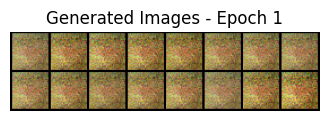

Epoch [1/10] Batch 0/1563: D_loss=0.0738, G_loss=4.6624
Epoch [1/10] Batch 100/1563: D_loss=0.3677, G_loss=5.4743
Epoch [1/10] Batch 200/1563: D_loss=0.1953, G_loss=3.7994
Epoch [1/10] Batch 300/1563: D_loss=0.1764, G_loss=4.3246
Epoch [1/10] Batch 400/1563: D_loss=0.2030, G_loss=4.0219
Epoch [1/10] Batch 500/1563: D_loss=0.2551, G_loss=6.1645
Epoch [1/10] Batch 600/1563: D_loss=0.1131, G_loss=3.6777
Epoch [1/10] Batch 700/1563: D_loss=0.1608, G_loss=3.5610
Epoch [1/10] Batch 800/1563: D_loss=0.0816, G_loss=4.6224
Epoch [1/10] Batch 900/1563: D_loss=0.0685, G_loss=3.9358
Epoch [1/10] Batch 1000/1563: D_loss=0.0355, G_loss=3.9444
Epoch [1/10] Batch 1100/1563: D_loss=0.2649, G_loss=4.1341
Epoch [1/10] Batch 1200/1563: D_loss=0.0658, G_loss=3.7060
Epoch [1/10] Batch 1300/1563: D_loss=0.1554, G_loss=4.2776
Epoch [1/10] Batch 1400/1563: D_loss=0.2754, G_loss=3.7288
Epoch [1/10] Batch 1500/1563: D_loss=0.0908, G_loss=3.7603


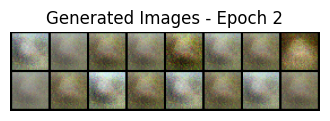

Epoch [2/10] Batch 0/1563: D_loss=0.1038, G_loss=3.7327
Epoch [2/10] Batch 100/1563: D_loss=0.1900, G_loss=5.8391
Epoch [2/10] Batch 200/1563: D_loss=0.1627, G_loss=4.1045
Epoch [2/10] Batch 300/1563: D_loss=0.1103, G_loss=4.6731
Epoch [2/10] Batch 400/1563: D_loss=0.1622, G_loss=4.2827
Epoch [2/10] Batch 500/1563: D_loss=0.1940, G_loss=4.9152
Epoch [2/10] Batch 600/1563: D_loss=0.2264, G_loss=3.9747
Epoch [2/10] Batch 700/1563: D_loss=0.2757, G_loss=4.3134
Epoch [2/10] Batch 800/1563: D_loss=0.1456, G_loss=2.6516
Epoch [2/10] Batch 900/1563: D_loss=0.1562, G_loss=3.2520
Epoch [2/10] Batch 1000/1563: D_loss=0.1504, G_loss=3.0696
Epoch [2/10] Batch 1100/1563: D_loss=0.1382, G_loss=3.8518
Epoch [2/10] Batch 1200/1563: D_loss=0.2779, G_loss=3.4359
Epoch [2/10] Batch 1300/1563: D_loss=0.1951, G_loss=4.5269
Epoch [2/10] Batch 1400/1563: D_loss=0.1874, G_loss=3.3270
Epoch [2/10] Batch 1500/1563: D_loss=0.3780, G_loss=2.4714


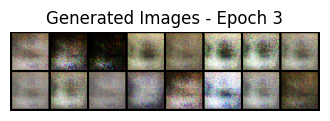

Epoch [3/10] Batch 0/1563: D_loss=0.2116, G_loss=3.0167
Epoch [3/10] Batch 100/1563: D_loss=0.3345, G_loss=3.2109
Epoch [3/10] Batch 200/1563: D_loss=0.4082, G_loss=2.6685
Epoch [3/10] Batch 300/1563: D_loss=0.2095, G_loss=3.5209
Epoch [3/10] Batch 400/1563: D_loss=0.3471, G_loss=2.9044
Epoch [3/10] Batch 500/1563: D_loss=0.2842, G_loss=2.7492
Epoch [3/10] Batch 600/1563: D_loss=0.2424, G_loss=3.1378
Epoch [3/10] Batch 700/1563: D_loss=0.2258, G_loss=2.6376
Epoch [3/10] Batch 800/1563: D_loss=0.3707, G_loss=3.1438
Epoch [3/10] Batch 900/1563: D_loss=0.2204, G_loss=2.7658
Epoch [3/10] Batch 1000/1563: D_loss=0.4096, G_loss=2.3020
Epoch [3/10] Batch 1100/1563: D_loss=0.3493, G_loss=3.1225
Epoch [3/10] Batch 1200/1563: D_loss=0.1897, G_loss=3.4165
Epoch [3/10] Batch 1300/1563: D_loss=0.3479, G_loss=2.5849
Epoch [3/10] Batch 1400/1563: D_loss=0.3098, G_loss=2.5436
Epoch [3/10] Batch 1500/1563: D_loss=0.1746, G_loss=2.4803


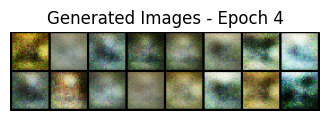

Epoch [4/10] Batch 0/1563: D_loss=0.2072, G_loss=3.2517
Epoch [4/10] Batch 100/1563: D_loss=0.4132, G_loss=2.4218
Epoch [4/10] Batch 200/1563: D_loss=0.4188, G_loss=1.9430
Epoch [4/10] Batch 300/1563: D_loss=0.3930, G_loss=2.5936
Epoch [4/10] Batch 400/1563: D_loss=0.5422, G_loss=2.8699
Epoch [4/10] Batch 500/1563: D_loss=0.2214, G_loss=3.3586
Epoch [4/10] Batch 600/1563: D_loss=0.5725, G_loss=2.2672
Epoch [4/10] Batch 700/1563: D_loss=0.6920, G_loss=2.4913
Epoch [4/10] Batch 800/1563: D_loss=0.5572, G_loss=1.8532
Epoch [4/10] Batch 900/1563: D_loss=0.5485, G_loss=1.9232
Epoch [4/10] Batch 1000/1563: D_loss=0.4123, G_loss=2.3890
Epoch [4/10] Batch 1100/1563: D_loss=0.2705, G_loss=2.9238
Epoch [4/10] Batch 1200/1563: D_loss=0.3156, G_loss=2.0996
Epoch [4/10] Batch 1300/1563: D_loss=0.5321, G_loss=2.1746
Epoch [4/10] Batch 1400/1563: D_loss=0.4633, G_loss=2.1688
Epoch [4/10] Batch 1500/1563: D_loss=0.4642, G_loss=1.9952


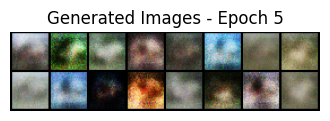

Epoch [5/10] Batch 0/1563: D_loss=0.5860, G_loss=1.9083
Epoch [5/10] Batch 100/1563: D_loss=0.6173, G_loss=1.7493
Epoch [5/10] Batch 200/1563: D_loss=0.5364, G_loss=2.1238
Epoch [5/10] Batch 300/1563: D_loss=0.4340, G_loss=1.5936
Epoch [5/10] Batch 400/1563: D_loss=0.4674, G_loss=2.7494
Epoch [5/10] Batch 500/1563: D_loss=0.2434, G_loss=2.9841
Epoch [5/10] Batch 600/1563: D_loss=0.4481, G_loss=1.8645
Epoch [5/10] Batch 700/1563: D_loss=0.3453, G_loss=1.9195
Epoch [5/10] Batch 800/1563: D_loss=0.4458, G_loss=2.3963
Epoch [5/10] Batch 900/1563: D_loss=0.5933, G_loss=1.5650
Epoch [5/10] Batch 1000/1563: D_loss=0.3405, G_loss=1.9165
Epoch [5/10] Batch 1100/1563: D_loss=0.4199, G_loss=1.7786
Epoch [5/10] Batch 1200/1563: D_loss=0.5663, G_loss=1.9811
Epoch [5/10] Batch 1300/1563: D_loss=0.5652, G_loss=2.0973
Epoch [5/10] Batch 1400/1563: D_loss=0.3526, G_loss=2.2372
Epoch [5/10] Batch 1500/1563: D_loss=0.4745, G_loss=1.8932


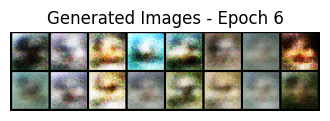

Epoch [6/10] Batch 0/1563: D_loss=0.3396, G_loss=2.0752
Epoch [6/10] Batch 100/1563: D_loss=0.4130, G_loss=1.9729
Epoch [6/10] Batch 200/1563: D_loss=0.5737, G_loss=1.6295
Epoch [6/10] Batch 300/1563: D_loss=0.4323, G_loss=2.0111
Epoch [6/10] Batch 400/1563: D_loss=0.3436, G_loss=2.1014
Epoch [6/10] Batch 500/1563: D_loss=0.4145, G_loss=1.8036
Epoch [6/10] Batch 600/1563: D_loss=0.4272, G_loss=1.8893
Epoch [6/10] Batch 700/1563: D_loss=0.4011, G_loss=1.6565
Epoch [6/10] Batch 800/1563: D_loss=0.3646, G_loss=2.0670
Epoch [6/10] Batch 900/1563: D_loss=0.3708, G_loss=1.9362
Epoch [6/10] Batch 1000/1563: D_loss=0.4884, G_loss=1.4161
Epoch [6/10] Batch 1100/1563: D_loss=0.4993, G_loss=1.6286
Epoch [6/10] Batch 1200/1563: D_loss=0.6008, G_loss=1.7608
Epoch [6/10] Batch 1300/1563: D_loss=0.5343, G_loss=1.4683
Epoch [6/10] Batch 1400/1563: D_loss=0.5474, G_loss=1.8072
Epoch [6/10] Batch 1500/1563: D_loss=0.4823, G_loss=1.4101


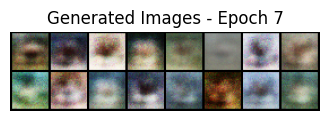

Epoch [7/10] Batch 0/1563: D_loss=0.5209, G_loss=1.2731
Epoch [7/10] Batch 100/1563: D_loss=0.7371, G_loss=1.4973
Epoch [7/10] Batch 200/1563: D_loss=0.5199, G_loss=1.7674
Epoch [7/10] Batch 300/1563: D_loss=0.5462, G_loss=1.5523
Epoch [7/10] Batch 400/1563: D_loss=0.5485, G_loss=1.5094
Epoch [7/10] Batch 500/1563: D_loss=0.5729, G_loss=1.4505
Epoch [7/10] Batch 600/1563: D_loss=0.6537, G_loss=1.2099
Epoch [7/10] Batch 700/1563: D_loss=0.5170, G_loss=1.6733
Epoch [7/10] Batch 800/1563: D_loss=0.5046, G_loss=1.2395
Epoch [7/10] Batch 900/1563: D_loss=0.5539, G_loss=1.5055
Epoch [7/10] Batch 1000/1563: D_loss=0.4908, G_loss=1.5708
Epoch [7/10] Batch 1100/1563: D_loss=0.4764, G_loss=1.6510
Epoch [7/10] Batch 1200/1563: D_loss=0.5070, G_loss=1.2763
Epoch [7/10] Batch 1300/1563: D_loss=0.4175, G_loss=1.7504
Epoch [7/10] Batch 1400/1563: D_loss=0.5323, G_loss=1.3960
Epoch [7/10] Batch 1500/1563: D_loss=0.4503, G_loss=1.6130


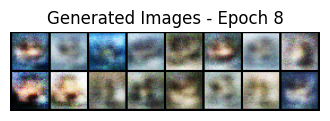

Epoch [8/10] Batch 0/1563: D_loss=0.5366, G_loss=1.3334
Epoch [8/10] Batch 100/1563: D_loss=0.6331, G_loss=1.2270
Epoch [8/10] Batch 200/1563: D_loss=0.5491, G_loss=1.4035
Epoch [8/10] Batch 300/1563: D_loss=0.6840, G_loss=1.1115
Epoch [8/10] Batch 400/1563: D_loss=0.6276, G_loss=1.5166
Epoch [8/10] Batch 500/1563: D_loss=0.7402, G_loss=1.4714
Epoch [8/10] Batch 600/1563: D_loss=0.4795, G_loss=1.5070
Epoch [8/10] Batch 700/1563: D_loss=0.5578, G_loss=1.2110
Epoch [8/10] Batch 800/1563: D_loss=0.7193, G_loss=1.2343
Epoch [8/10] Batch 900/1563: D_loss=0.5931, G_loss=1.1845
Epoch [8/10] Batch 1000/1563: D_loss=0.5483, G_loss=1.2080
Epoch [8/10] Batch 1100/1563: D_loss=0.5043, G_loss=1.3821
Epoch [8/10] Batch 1200/1563: D_loss=0.4903, G_loss=1.2318
Epoch [8/10] Batch 1300/1563: D_loss=0.6757, G_loss=1.2238
Epoch [8/10] Batch 1400/1563: D_loss=0.6098, G_loss=1.3738
Epoch [8/10] Batch 1500/1563: D_loss=0.5347, G_loss=1.3665


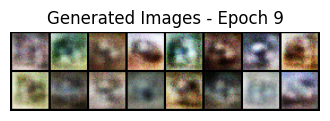

Epoch [9/10] Batch 0/1563: D_loss=0.5534, G_loss=1.3925
Epoch [9/10] Batch 100/1563: D_loss=0.6765, G_loss=0.9547
Epoch [9/10] Batch 200/1563: D_loss=0.7018, G_loss=1.1284
Epoch [9/10] Batch 300/1563: D_loss=0.6390, G_loss=0.9968
Epoch [9/10] Batch 400/1563: D_loss=0.7649, G_loss=1.0943
Epoch [9/10] Batch 500/1563: D_loss=0.5676, G_loss=1.3882
Epoch [9/10] Batch 600/1563: D_loss=0.5845, G_loss=1.2587
Epoch [9/10] Batch 700/1563: D_loss=0.5213, G_loss=1.2172
Epoch [9/10] Batch 800/1563: D_loss=0.6090, G_loss=1.2004
Epoch [9/10] Batch 900/1563: D_loss=0.5695, G_loss=1.1347
Epoch [9/10] Batch 1000/1563: D_loss=0.6079, G_loss=1.3083
Epoch [9/10] Batch 1100/1563: D_loss=0.6003, G_loss=1.2520
Epoch [9/10] Batch 1200/1563: D_loss=0.5085, G_loss=1.1836
Epoch [9/10] Batch 1300/1563: D_loss=0.5472, G_loss=1.2550
Epoch [9/10] Batch 1400/1563: D_loss=0.5788, G_loss=1.2782
Epoch [9/10] Batch 1500/1563: D_loss=0.6501, G_loss=1.1817


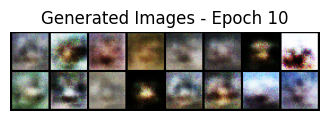

In [9]:
# ✅ Training Loop
epochs = 10
for epoch in range(epochs):
    for i, (real_imgs, _) in enumerate(dataloader):
        real_imgs = real_imgs.to(device)
        batch_size = real_imgs.shape[0]

        # ✅ Generate fake images
        z = torch.randn(batch_size, latent_dim).to(device)
        fake_imgs = generator(z)

        # ✅ Labels
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        # ✅ Train Discriminator
        optimizer_D.zero_grad()
        real_loss = criterion(discriminator(real_imgs), real_labels)
        fake_loss = criterion(discriminator(fake_imgs.detach()), fake_labels)
        d_loss = (real_loss + fake_loss) / 2
        d_loss.backward()
        optimizer_D.step()

        # ✅ Train Generator
        optimizer_G.zero_grad()
        gen_loss = criterion(discriminator(fake_imgs), real_labels)
        gen_loss.backward()
        optimizer_G.step()

        # ✅ Print progress
        if i % 100 == 0:
            print(f"Epoch [{epoch}/{epochs}] Batch {i}/{len(dataloader)}: D_loss={d_loss:.4f}, G_loss={gen_loss:.4f}")

    # ✅ Visualize Generated Images
    with torch.no_grad():
        test_z = torch.randn(16, latent_dim).to(device)
        gen_imgs = generator(test_z).cpu()
        
        # Plot generated images
        plt.figure(figsize=(4, 4))
        plt.axis("off")
        plt.title(f"Generated Images - Epoch {epoch+1}")
        plt.imshow(vutils.make_grid(gen_imgs, normalize=True).permute(1, 2, 0))
        plt.show()
